In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import os

In [2]:

# # List of CSV files and their corresponding table names
# csv_files = [
#     ('customers.csv', 'customers'),
#     ('orders.csv', 'orders'),
#     ('sellers.csv', 'sellers'),
#     ('products.csv', 'products'),
#     ('geolocation.csv', 'geolocation'),
#     ('payments.csv', 'payments'),
#     ('order_items.csv', 'order_items') # Added payments.csv for specific handling
# ]

# # Connect to the MySQL database
# conn = mysql.connector.connect(
#     host='localhost',
#     user='root',
#     password='Niraj@2307',
#     database='ecommerce'
# )
# cursor = conn.cursor()

# # Folder containing the CSV files
# folder_path = 'C:/Users/LENOVO/pandasDataset/Personal Projects/Portfolio Projects/Python + MySQL/E-commerce'

# def get_sql_type(dtype):
#     if pd.api.types.is_integer_dtype(dtype):
#         return 'INT'
#     elif pd.api.types.is_float_dtype(dtype):
#         return 'FLOAT'
#     elif pd.api.types.is_bool_dtype(dtype):
#         return 'BOOLEAN'
#     elif pd.api.types.is_datetime64_any_dtype(dtype):
#         return 'DATETIME'
#     else:
#         return 'TEXT'

# for csv_file, table_name in csv_files:
#     file_path = os.path.join(folder_path, csv_file)
    
#     # Read the CSV file into a pandas DataFrame
#     df = pd.read_csv(file_path)
    
#     # Replace NaN with None to handle SQL NULL
#     df = df.where(pd.notnull(df), None)
    
#     # Debugging: Check for NaN values
#     print(f"Processing {csv_file}")
#     print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

#     # Clean column names
#     df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

#     # Generate the CREATE TABLE statement with appropriate data types
#     columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
#     create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
#     cursor.execute(create_table_query)

#     # Insert DataFrame data into the MySQL table
#     for _, row in df.iterrows():
#         # Convert row to tuple and handle NaN/None explicitly
#         values = tuple(None if pd.isna(x) else x for x in row)
#         sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
#         cursor.execute(sql, values)

#     # Commit the transaction for the current CSV file
#     conn.commit()

# # Close the connection
# conn.close()

In [3]:
db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "Niraj@2307",
                            database = "ecommerce")
cur = db.cursor()

#### 1. List all unique cities where customers are located


In [4]:
query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

#### 2. Count the number of orders placed in 2017.

In [34]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017"""
cur.execute(query)
data = cur.fetchall()
print("The number of orders placed in 2017 are :" ,data[0][0])

The number of orders placed in 2017 are : 45101


#### 3. Find the total sales per category

In [26]:
query = """ select lower(products.product_category) category, round(sum(payments.payment_value),2) sales
from products join order_items on
products.product_id = order_items.product_id
join payments on
order_items.order_id = payments.order_id
group by category"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['Product_Category', 'Total_Sales'])
df

,Product_Category,Total_Sales
0,perfumery,506738.66
1,furniture decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,la cuisine,2913.53
71,fashion children's clothing,785.67
72,pc gamer,2174.43


#### 4. Calculate the percentage of orders that were paid in installments.

In [33]:
query = """select (sum(case when payment_installments >= 1 then 1
else 0 end))/count(*)*100 from payments  """
cur.execute(query)
data = cur.fetchall()
print("The percentage of orders paid in installments are :",data[0][0])

The percentage of orders paid in installments are : 99.9981


#### 5. Count the number of customers from each state.

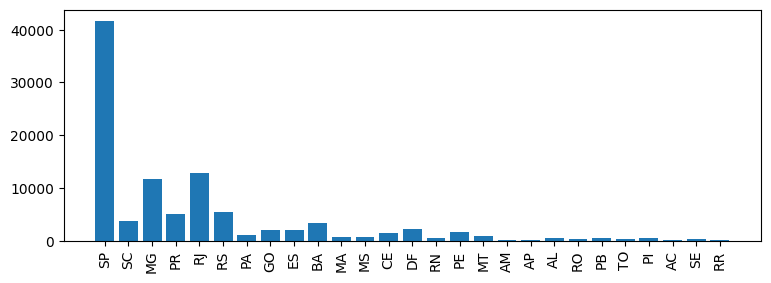

In [40]:
query = """ select customer_state, count(customer_id) 
from customers
group by customer_state"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['State', 'Total_Customers'])
plt.figure(figsize = (9,3))
plt.bar(x = df['State'], height = df['Total_Customers'])
plt.xticks(rotation = 90)
plt.show()

#### 6.  Calculate the number of orders per month in 2018.

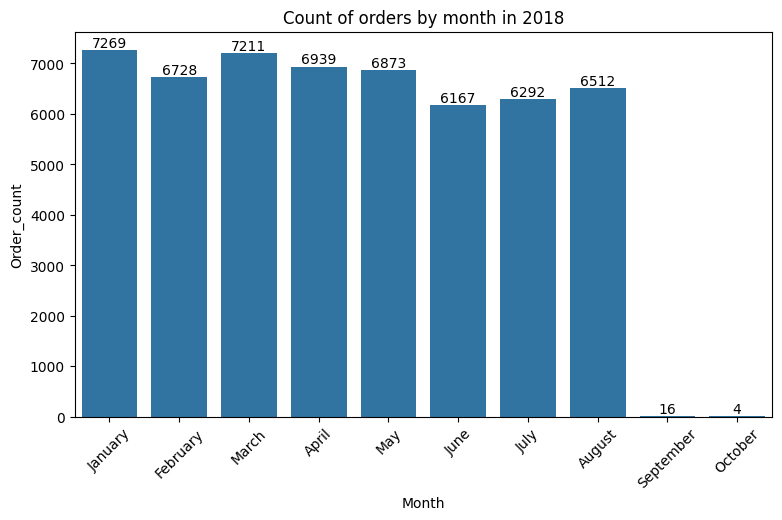

In [42]:
query = """ select monthname(order_purchase_timestamp) month, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by month"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['Month', 'Order_count'])
o = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']
plt.figure(figsize = (9,5))
ax = sns.barplot(x = df['Month'], y = df['Order_count'], data = df, order = o)
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45)
plt.title("Count of orders by month in 2018")
plt.show()

#### 7. Find the average number of products per order, grouped by customer city.

In [44]:
query = """ with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as co
from orders join order_items on
orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.co),2) average_order
from customers join count_per_order on
customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_order desc;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Customer_City", "Avg_Products_Per_Order"])
df

,Customer_City,Avg_Products_Per_Order
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
...,...,...
4105,lagoa da canoa,1.00
4106,japaratuba,1.00
4107,sebastiao leal,1.00
4108,morro agudo de goias,1.00


#### 8. Calculate the percentage of total revenue contributed by each product category.

In [45]:
query = """ select lower(products.product_category) category,
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) percentage_revenue
from products join order_items on
products.product_id = order_items.product_id
join payments on
order_items.order_id = payments.order_id
group by category order by percentage_revenue desc"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['Product_Category', 'Percentage_Revenue'])
df.head(10)

,Product_Category,Percentage_Revenue
0,bed table bath,10.70
1,health beauty,10.35
2,computer accessories,9.90
3,furniture decoration,8.93
4,watches present,8.93
5,sport leisure,8.70
6,housewares,6.84
7,automotive,5.32
8,garden tools,5.24
9,cool stuff,4.87


#### 9. Identify the correlation between product price and the number of times a product has been purchased.

In [12]:
query = """select upper(products.product_category), count(order_items.product_id), 
round(avg(order_items.price),2)
from products join order_items on
products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['Category', 'Product_Count', 'Avg_Price'])
df1 = pd.DataFrame(df[['Product_Count','Avg_Price']], columns = [ 'Product_Count', 'Avg_Price'])
df1.corr()

,Product_Count,Avg_Price
Product_Count,1.000000,-0.106315
Avg_Price,-0.106315,1.000000


**There is a negative and close to zero correlation hence price and the number of times the product has been purchased does not result the overall sales**

#### 10. Calculate the total revenue generated by each seller, and rank them by revenue.

In [13]:
query = """select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, round(sum(payments.payment_value),2) revenue
from order_items join payments on
order_items.order_id = payments.order_id
group by order_items.seller_id) as a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['Seller_id', 'Revenue','Rank'])
df.head(20)

,Seller_id,Revenue,Rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.91,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04,2
2,4a3ca9315b744ce9f8e9374361493884,301245.27,3
3,1f50f920176fa81dab994f9023523100,290253.42,4
4,53243585a1d6dc2643021fd1853d8905,284903.08,5
5,da8622b14eb17ae2831f4ac5b9dab84a,272219.32,6
6,4869f7a5dfa277a7dca6462dcf3b52b2,264166.12,7
7,955fee9216a65b617aa5c0531780ce60,236322.30,8
8,fa1c13f2614d7b5c4749cbc52fecda94,206513.23,9
9,7e93a43ef30c4f03f38b393420bc753a,185134.21,10


### Advanced Queries

#### 1. Calculate the moving average of order values for each customer over their order history.

In [14]:
query = """select *, avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from orders join payments on
orders.order_id = payments.order_id) as a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['Customer_id', 'Purchase_Timestamp','Payment', 'Mov_Avg'])
df.head(20)

,Customer_id,Purchase_Timestamp,Payment,Mov_Avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
5,0004164d20a9e969af783496f3408652,2017-04-12 08:35:12,71.80,71.800003
6,000419c5494106c306a97b5635748086,2018-03-02 17:47:40,49.40,49.400002
7,00046a560d407e99b969756e0b10f282,2017-12-18 11:08:30,166.59,166.589996
8,00050bf6e01e69d5c0fd612f1bcfb69c,2017-09-17 16:04:44,85.23,85.230003
9,000598caf2ef4117407665ac33275130,2018-08-11 12:14:35,1255.71,1255.709961


#### 2. Calculate the cumulative sales per month for each year.

In [15]:
query = """ select *, sum(payment) over(order by years, months) as cumulative_sales from
(select year(orders.order_purchase_timestamp) years, month(orders.order_purchase_timestamp) months,
round(sum(payments.payment_value),2) as payment from orders join payments on
orders.order_id = payments.order_id
group by years, months order by years, months) as a """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['Year','Month', 'Sales', 'Cumulative Sales'])
df

,Year,Month,Sales,Cumulative Sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


#### 3. Calculate the year-over-year growth rate of total sales.

In [16]:
query = """ with a as(select year(orders.order_purchase_timestamp) years,
round(sum(payments.payment_value),2) as payment from orders join payments on
orders.order_id = payments.order_id
group by years order by years)

select years ,(payment- lag(payment,1) over(order by years))/lag(payment,1) over(order by years)*100 from a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Year", "YOY % Growth"])
df

,Year,YOY % Growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


#### 4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [17]:
query = """ with cte1 as(select orders.customer_id, min(orders.order_purchase_timestamp) first_order 
from orders group by orders.customer_id),

cte2 as(select cte1.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from cte1 join orders on
cte1.customer_id = orders.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < date_add(first_order, interval 6 month)
group by cte1.customer_id)

select 100.0*(count(distinct cte1.customer_id))/count(distinct cte2.customer_id) percentage
from cte1 left join cte2 on
cte1.customer_id = cte2.customer_id """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns =['Percentage'])
df

,Percentage
0,None


**Since there are no customers who have bought recently in the last 6 months hence the percentage is none.**

#### 5. Identify the top 3 customers who spent the most money in each year.

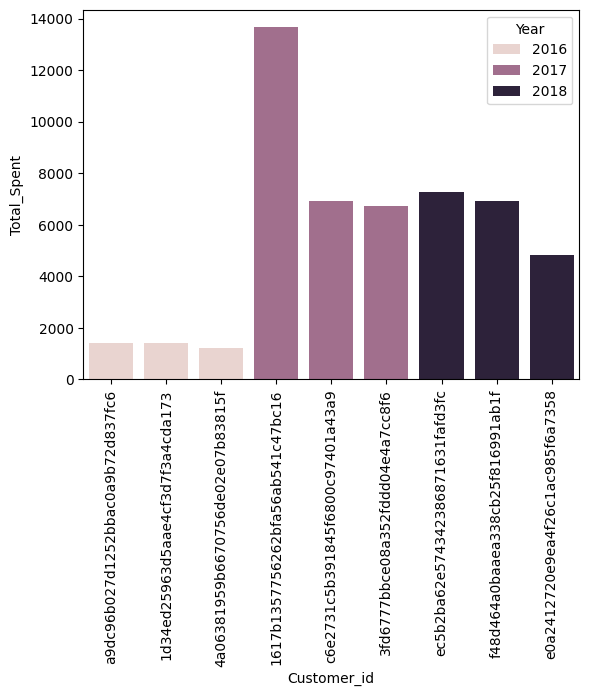

In [21]:
query = """ select * from
(select year(orders.order_purchase_timestamp) years, orders.customer_id,
round(sum(payments.payment_value),2) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) top_customers
from orders join payments on
orders.order_id = payments.order_id
group by year(orders.order_purchase_timestamp), orders.customer_id) as tables
where top_customers <= 3"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['Year', 'Customer_id', 'Total_Spent', 'Rank'])
sns.barplot(x = 'Customer_id', y = 'Total_Spent', data = df, hue = 'Year')
plt.xticks(rotation = 90)
plt.show()